In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D
fp_exp1 = '/home/mremington/Documents/krattle_analysis/krattle_analysis/per_cycle_analysis/data/strike_exp_pure_point_classifacation.csv'
pc = pd.read_csv(fp_exp1,header = 0, index_col=None)


In [13]:
experiment_names = ['owl_exp_pure',
                    'owl_exp_mixed',
                    'strike_exp_pure',
                    'strike_exp_mixed',
                    'energy_gain_pure',
                    'energy_gain_mixed',
                    ]
totals = []
point_class = []
for label in experiment_names:
    for i in range(1,7):
        file_path_totals = '/home/mremington/Documents/uumarrty_exps/{}/exp{}/Data/totals.csv'.format(label,i)
        temp_exp_total = pd.read_csv(file_path_totals,header = 0, index_col=None)
        temp_exp_total['experiment_name'] = [label for i in range(len(temp_exp_total))]
        totals.append(temp_exp_total)
        
totals = pd.concat(totals, ignore_index=False)


result = pd.merge(pc,
                  totals[['sim_id','data_type','mean_bush_pref']],
                  how="left",
                  left_on=['sim_id','org'],
                  right_on=["sim_id", "data_type"])



In [14]:
table = pd.pivot_table(result, values=['count_str_flip','mean_magnitude_of_strategy_flip','mean_strategy_flip_time','mean_bush_pref'], index=['exp_name','sim_id','exp'],
                    columns=['org'])
table = table.reset_index()
table.columns = ['exp_name', 'sim_id','exp',
                 'krat_str_flip','snake_str_flip',
                 'krat_mean_bush_pref','snake_mean_bush_pref',
                 'krat_mean_magnitude_of_strategy_flip','snake_mean_magnitude_of_strategy_flip',
                'krat_mean_str_flip_time','snake_mean_str_flip_time',
                ]
table['krat_mean_str_flip_time'] = table['krat_mean_str_flip_time'].fillna(0)
table['snake_mean_str_flip_time'] = table['snake_mean_str_flip_time'].fillna(0)
table['krat_mean_magnitude_of_strategy_flip'] = table['krat_mean_magnitude_of_strategy_flip'].fillna(0)
table['snake_mean_magnitude_of_strategy_flip'] = table['snake_mean_magnitude_of_strategy_flip'].fillna(0)


In [58]:
#pc[pc['exp']=='experiment4']['mean_strategy_flip_time'].unique()

[(0.0, 50.0)]

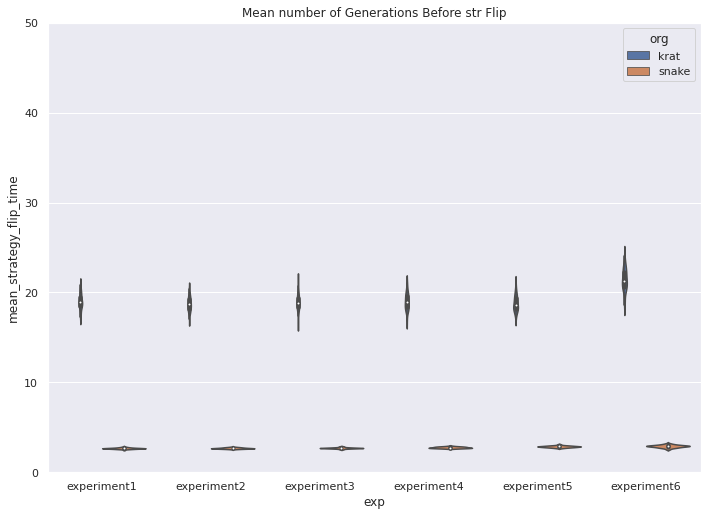

In [4]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.violinplot(x="exp", y="mean_strategy_flip_time",hue="org", data=pc)
ax.set_title("Mean number of Generations Before str Flip")
ax.set(ylim=(0, 50))

Text(0.5, 1.0, 'Mean Magnitude of Strategy Flip')

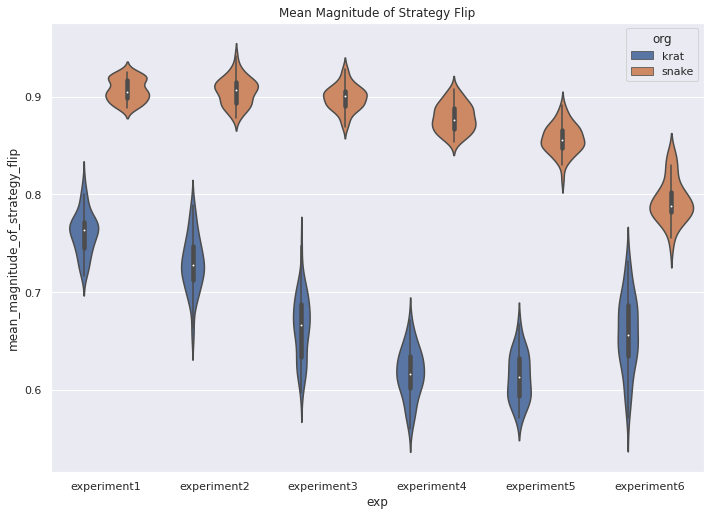

In [6]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.violinplot(x="exp", y="mean_magnitude_of_strategy_flip",hue="org", data=pc)
ax.set_title("Mean Magnitude of Strategy Flip")
#ax.set(ylim=(0, 100))

Text(0.5, 1.0, 'Total Count Str Flips per Sim')

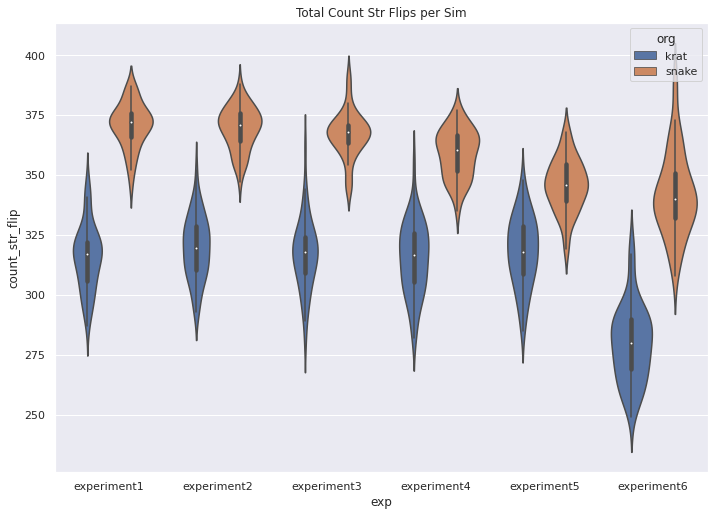

In [5]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.violinplot(x="exp", y="count_str_flip",hue="org", data=pc)
ax.set_title("Total Count Str Flips per Sim")

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.violinplot(x="exp", y="count_str_flip",hue="org", data=mixed_pc)

In [15]:
# sns.displot(table, x="snake_str_flip", kind="kde")

In [16]:
# sns.displot(table, x="krat_str_flip", kind="kde")

<IPython.core.display.Javascript object>


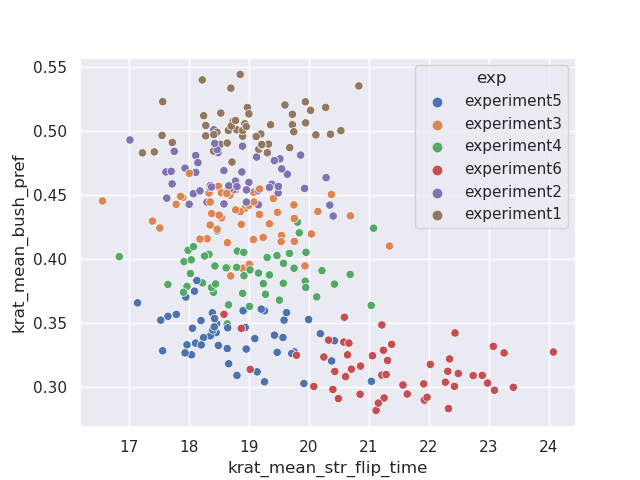

<AxesSubplot:xlabel='krat_mean_str_flip_time', ylabel='krat_mean_bush_pref'>

In [12]:
%matplotlib notebook
sns.scatterplot(data=table , x='krat_mean_str_flip_time', y='krat_mean_bush_pref', hue="exp")

In [9]:
#table[table['exp'].isin(['experiment6'])]['snake_str_flip'].unique()#table['snake_mean_str_time']

<IPython.core.display.Javascript object>


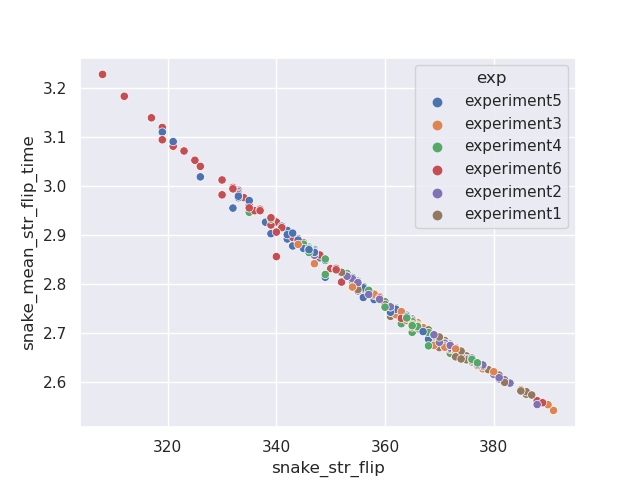

<AxesSubplot:xlabel='snake_str_flip', ylabel='snake_mean_str_flip_time'>

In [11]:
%matplotlib notebook
sns.scatterplot(data=table, x='snake_str_flip', y='snake_mean_str_flip_time', hue="exp")

<AxesSubplot:xlabel='snake_str_flip', ylabel='snake_mean_magnitude_of_strategy_flip'>

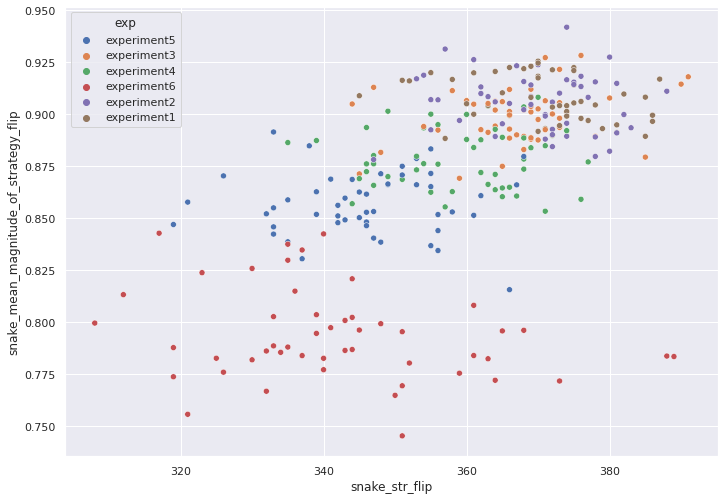

In [10]:
sns.scatterplot(data=table, x='snake_str_flip', y='snake_mean_magnitude_of_strategy_flip', hue="exp")

<AxesSubplot:xlabel='snake_mean_str_flip_time', ylabel='snake_mean_magnitude_of_strategy_flip'>

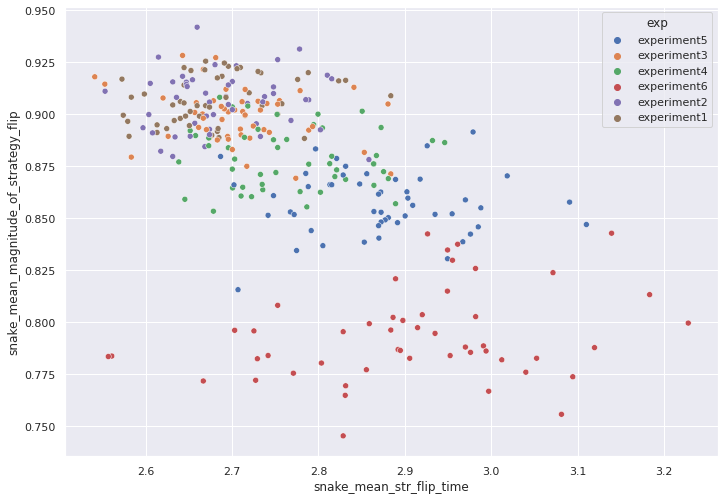

In [9]:
sns.scatterplot(data=table, x='snake_mean_str_flip_time', y='snake_mean_magnitude_of_strategy_flip', hue="exp")

<IPython.core.display.Javascript object>


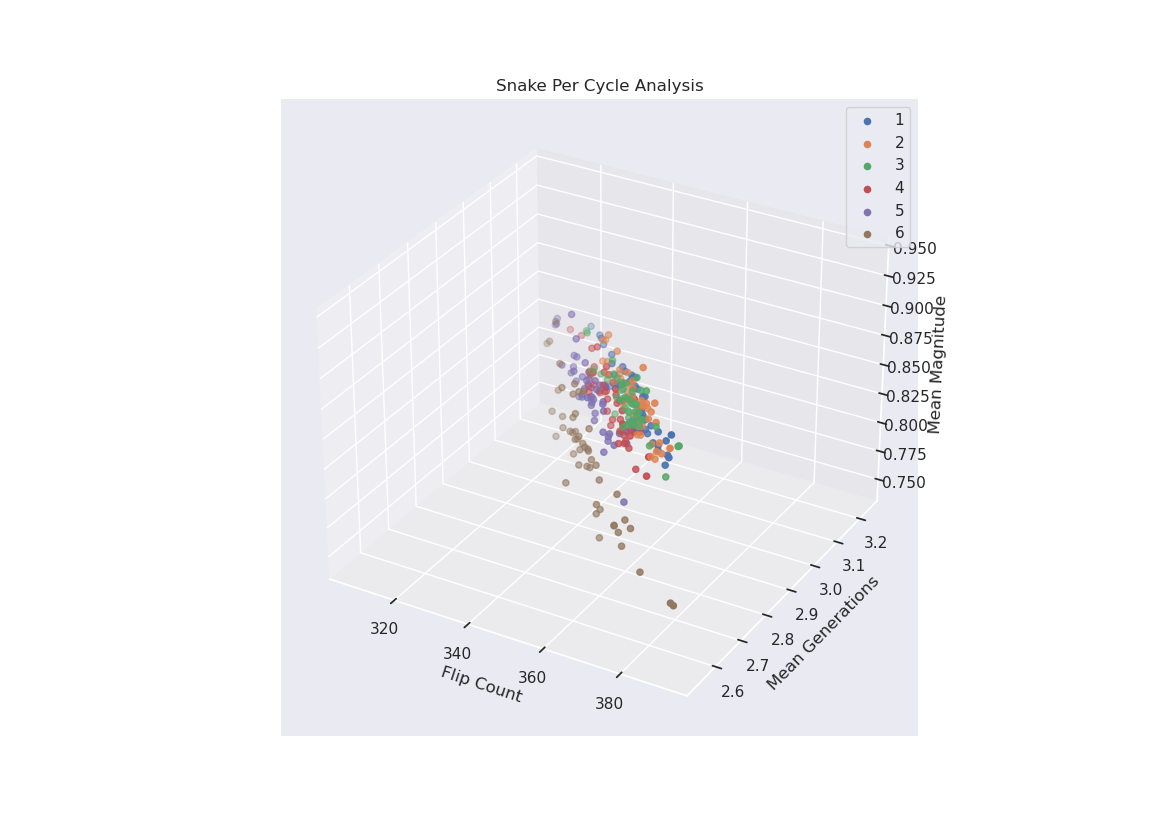

In [66]:
%matplotlib notebook
#https://www.python-graph-gallery.com/372-3d-pca-result
# https://stackoverflow.com/questions/34748798/python-legend-in-3dplot
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
exp_groupings = table.groupby(['exp'])

exp = [int(i[-1]) for i in table['exp']]

ax.set_xlabel("Flip Count")
ax.set_ylabel("Mean Generations")
ax.set_zlabel("Mean Magnitude")
ax.set_title("Snake Per Cycle Analysis")

for name, exp in exp_groupings:
    x = exp['snake_str_flip']
    y = exp['snake_mean_str_flip_time']
    z = exp['snake_mean_magnitude_of_strategy_flip']
    #ax.plot(x, y, z, label=name, marker='o')
    ax.scatter(x, y, z, label=name[-1])
ax.legend()

plt.show()

<IPython.core.display.Javascript object>


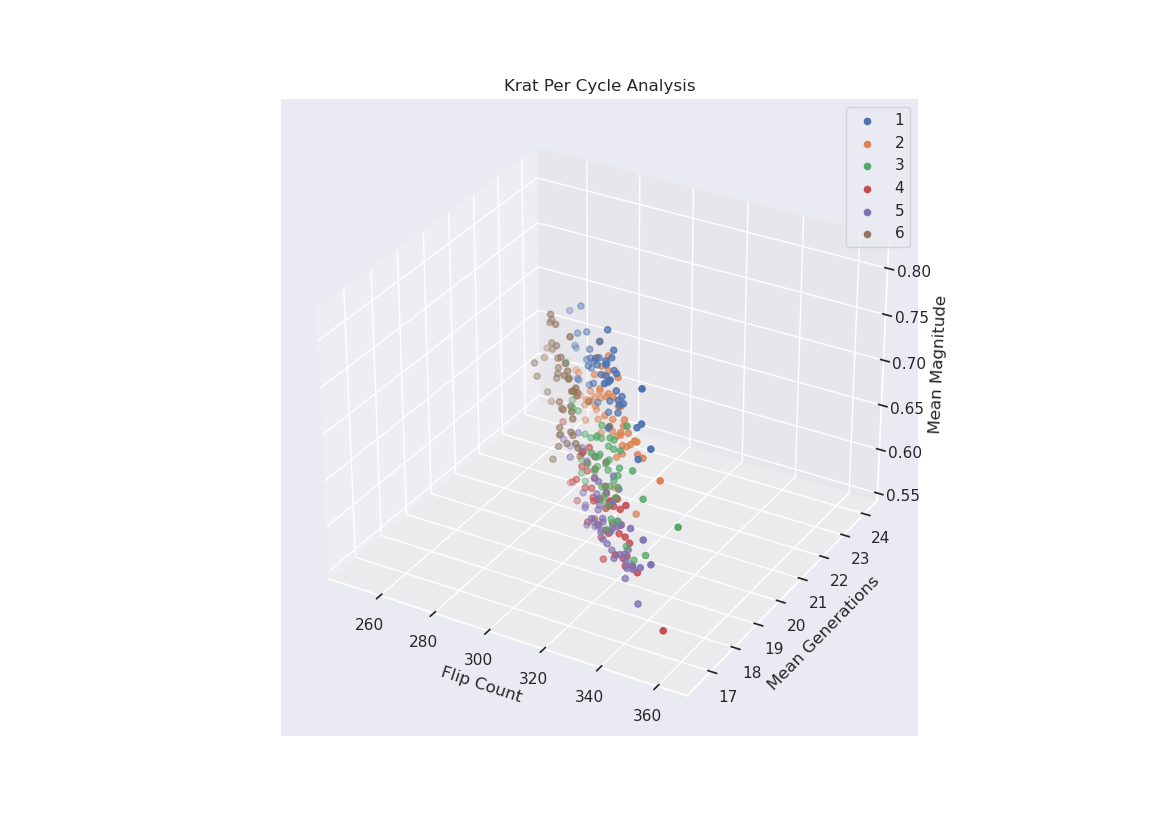

In [65]:
%matplotlib notebook
#https://www.python-graph-gallery.com/372-3d-pca-result
# https://stackoverflow.com/questions/34748798/python-legend-in-3dplot
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
exp_groupings = table.groupby(['exp'])

exp = [int(i[-1]) for i in table['exp']]

ax.set_xlabel("Flip Count")
ax.set_ylabel("Mean Generations")
ax.set_zlabel("Mean Magnitude")
ax.set_title("Krat Per Cycle Analysis")

for name, exp in exp_groupings:
    x = exp['krat_str_flip']
    y = exp['krat_mean_str_flip_time']
    z = exp['krat_mean_magnitude_of_strategy_flip']
    #ax.plot(x, y, z, label=name, marker='o')
    ax.scatter(x, y, z, label=name[-1])
ax.legend()

plt.show()

<IPython.core.display.Javascript object>


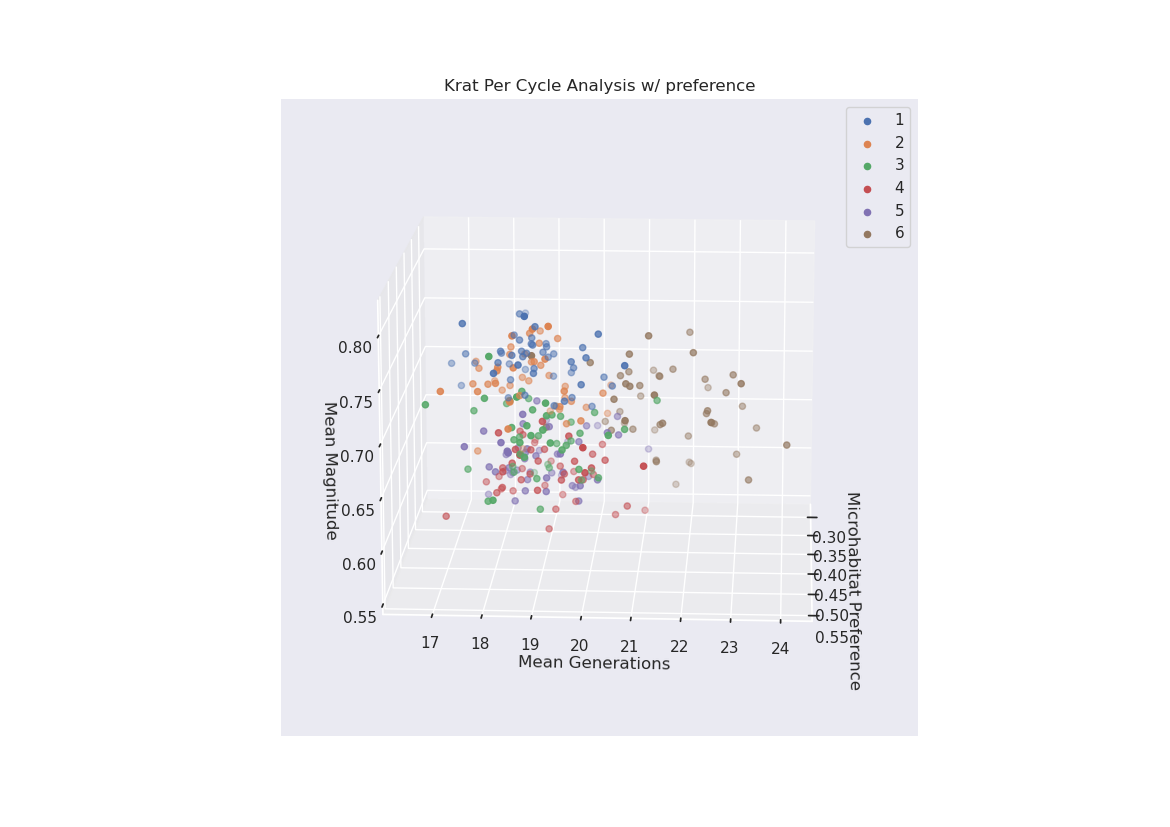

In [63]:
%matplotlib notebook
#https://www.python-graph-gallery.com/372-3d-pca-result
# https://stackoverflow.com/questions/34748798/python-legend-in-3dplot
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
exp_groupings = table.groupby(['exp'])

exp = [int(i[-1]) for i in table['exp']]

ax.set_xlabel("Microhabitat Preference")
ax.set_ylabel("Mean Generations")
ax.set_zlabel("Mean Magnitude")
ax.set_title("Krat Per Cycle Analysis w/ preference")

for name, exp in exp_groupings:
    x = exp['krat_mean_bush_pref']
    y = exp['krat_mean_str_flip_time']
    z = exp['krat_mean_magnitude_of_strategy_flip']
    #ax.plot(x, y, z, label=name, marker='o')
    ax.scatter(x, y, z, label=name[-1])
ax.legend()

plt.show()

In [10]:
#### Grid 1 #######
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.violinplot(x="exp", y="mean_magnitude_of_strategy_flip",hue="org", data=pc)
ax.set_title("Mean Magnitude of Strategy Flip")

[nan, 14, 15, 16, 17, 18, 19, 20, 21, 22]
